In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
df = pd.read_csv('data_after_missing_value_treatment.csv')

In [77]:
df.sample(5)

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
6,tulip leaf,flat,sector 69,2.06,11386.0,3,3,3,16.0,Relatively New,1607.373469,0,0,0,0,0,0,49
3575,m3m merlin,flat,sector 67,4.50,14267.0,4,4,3+,15.0,Relatively New,2809.603955,0,1,0,0,0,1,158
2928,m3m golfestate,flat,sector 65,6.15,18331.0,3,4,2,20.0,Relatively New,3355.000000,0,0,0,0,0,0,34
2447,supertech new soft launch,flat,sector 68,0.84,7119.0,2,2,2,7.0,New Property,1180.000000,0,0,0,0,0,0,0
2607,pyramid urban homes 2,flat,sector 86,0.43,8582.0,2,2,1,6.0,New Property,687.632891,1,0,0,0,0,0,92


In [78]:
# We need price per sqft column for the geographical map
# We will calculate average price per sqft of each sector and then plot on the geo map

# We need latitude and longitude value of the sectors in order to make the geomap

In [82]:
latlong = pd.read_csv('latlong.csv')

In [84]:
latlong.sample(5)

,sector,coordinates
9,sector 10,"28.4537° N, 77.0009° E"
83,sector 76,"28.3935° N, 76.9888° E"
81,sector 74,"28.4158° N, 77.0118° E"
77,sector 70,"28.3968° N, 77.0233° E"
107,sector 97,"28.4086° N, 76.8793° E"


In [86]:
# Extracting latitude and longitude separately
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [88]:
latlong

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176
...,...,...,...,...
124,sector 113,"28.5287° N, 77.0233° E",28.5287,77.0233
125,sector 114,"28.5334° N, 77.0118° E",28.5334,77.0118
126,sector 115,"28.5385° N, 77.0061° E",28.5385,77.0061
127,gwal pahari,"28.4484° N, 77.0210° E",28.4484,77.0210


In [90]:
new_df = df.merge(latlong, on = 'sector')

In [92]:
new_df.head(5)

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,puja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,paras dews,flat,sector 106,1.20,11605.0,3,3,3,12.0,Relatively New,...,1,0,0,0,0,0,158,"28.5007° N, 77.0003° E",28.5007,77.0003
1,umang winter hills,flat,sector 77,0.86,6408.0,2,2,2,16.0,New Property,...,0,0,0,0,0,1,79,"28.3801° N, 76.9845° E",28.3801,76.9845
2,dlf the ultima,flat,sector 81,2.21,10365.0,3,3,3+,3.0,Relatively New,...,0,1,0,0,0,2,149,"28.3867° N, 76.9485° E",28.3867,76.9485
3,tulip leaf,flat,sector 69,2.06,11386.0,3,3,3,16.0,Relatively New,...,0,0,0,0,0,0,49,"28.3966° N, 77.0341° E",28.3966,77.0341
4,sare crescent parc,flat,sector 92,0.95,5013.0,4,5,3+,13.0,Relatively New,...,0,0,0,0,0,0,0,"28.4079° N, 76.9153° E",28.4079,76.9153


In [94]:
new_df['built_up_area'].value_counts()

built_up_area
3240.000000    41
1800.000000    37
1350.000000    34
2700.000000    30
1900.000000    27
               ..
1451.495597     1
5359.192599     1
4923.809577     1
2491.591988     1
330.000000      1
Name: count, Length: 1600, dtype: int64

In [96]:
# Calculating sectorwise average price per sqft
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [98]:
group_df.head(5)

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.888889,3042.702256,28.4484,77.0210
manesar,0.964688,4761.187500,1969.972253,28.3515,76.9428
sector 1,1.860000,8249.500000,2324.521575,28.3663,76.9456
sector 102,1.696636,10603.719626,1548.708764,28.4750,76.9715
sector 103,1.495000,7445.476190,1859.429332,28.4949,76.9845


In [100]:
fig = px.scatter_mapbox(group_df, lat = 'latitude', lon = 'longitude', color = 'price_per_sqft', size = 'built_up_area',
                        color_continuous_scale = px.colors.cyclical.IceFire, zoom = 5,
                        mapbox_style = 'open-street-map', text = group_df.index)
fig.show()

In [102]:
# Wordcloud

df1 = pd.read_csv('flats.csv')

In [104]:
df1.sample(5)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
1477,4 BHK Flat in Sector 104 Gurgaon,https://www.99acres.com/4-bhk-bedroom-apartmen...,ATS Triumph3.9 ★,2.62 Crore,"₹ 8,317/sq.ft.",Super Built up area 3150(292.64 sq.m.),4 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"6152, Sector 104 Gurgaon, Gurgaon, Haryana",14th of 27 Floors,North,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...","Situated in sector 104 gurgaon, ats triumph is...",NaN,"['Water purifier', 'Centrally Air Conditioned'...","['Green Area4 out of 5', 'Construction5 out of...",E69696890
2445,2 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Ansal Heights 86,82 Lac,"₹ 6,029/sq.ft.",Super Built up area 1360(126.35 sq.m.)Built Up...,2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Sector 86 Gurgaon, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",2bhk ready to move flat in ansal heights secto...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment5 out of 5', 'Lifestyle5 out of 5...",E63659868
2653,3 BHK Flat in Sushant Lok Phase 1,https://www.99acres.com/3-bhk-bedroom-apartmen...,Silverglades Hightown Residences,4.2 Crore,"₹ 19,767/sq.ft.",Super Built up area 2150(199.74 sq.m.),3 Bedrooms,4 Bathrooms,2 Balconies,NaN,"Sushant Lok Phase 1, Gurgaon, Haryana",7th of 26 Floors,East,Dec 2024,"['Iffco Chowk Metro Station', 'Galleria Market...",We are the proud owners of this 3 bhk apartmen...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment5 out of 5', 'Safety4.5 out of 5'...",L69042452
1673,4 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/4-bhk-bedroom-apartmen...,DLF New Town Heights 24.0 ★,1.55 Crore,"₹ 6,578/sq.ft.",Super Built up area 2356(218.88 sq.m.)Carpet a...,4 Bedrooms,4 Bathrooms,3+ Balconies,"Pooja Room,Servant Room","Sector 86 Gurgaon, Gurgaon, Haryana",12nd of 22 Floors,North-East,5 to 10 Year Old,"['City Square', 'Vatika Town Square', 'Bharat ...","Sun facing, park facing, best location for sal...","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction4.5 out ...",N61446680
2933,3 BHK Flat in Sector 67A Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ireo The Corridors,2 Crore,"₹ 11,580/sq.ft.",Super Built up area 1727(160.44 sq.m.)Carpet a...,3 Bedrooms,3 Bathrooms,2 Balconies,Others,"Sector 67A Gurgaon, Gurgaon, Haryana",6th of 19 Floors,NaN,Under Construction,"['Huda Metro Station (Gurugram)', 'Paras Trini...",3 bhk 3bath balcony park facing,"['1 Fan', '1 Geyser', '1 Light', '1 AC', '1 Ch...","['Intercom Facility', 'Lift(s)', 'Park']","['Safety5 out of 5', 'Lifestyle4 out of 5', 'E...",E58721404


In [106]:
# df1 don't have sector column as  it is the scraped initial data so we are merging df & df1
wordcloud_df = df1.merge(df, left_index = True, right_index = True)[['features','sector']]
# Extracted featires & sectors as wordcloud require that info only

In [108]:
wordcloud_df.sample(5)

,features,sector
2902,NaN,sector 3 phase 2
496,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 3 phase 3 extension
1680,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 67
201,NaN,sector 70
2060,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",sector 71


In [113]:
# Wordcloud is basically ki which facility is commonly available and which one is rare facility (amenities)

In [115]:
# We will make a list in which all facilities should be listed there
# then convert to string as wordcloud needs string 

In [127]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)
# What does literal_eval and ast does ?

In [125]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Lift(s)',
 'Water Storage',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Private Garden / Terrace',
 'Lift(s)',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Natural Light',
 'Airy Rooms',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Water softening plant',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Maintenance Staff',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Rain Water Harvesting',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 

In [129]:
feature_text = ' '.join(main)

In [131]:
feature_text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Lift(s) Water Storage Visitor Parking Security / Fire Alarm Maintenance Staff Water Storage Park Visitor Parking Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Swimming Pool Park Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Private Garden / Terrace Lift(s) Maintenance Staff False Ceiling Lighting Water Storage Visitor Parking Swimming Pool Natural Light Airy Rooms Fitness Centre / GYM Club house / Community Center Water softening plant Power Back-up Intercom Facility Lift(s) Swimming Pool Maintenance Staff Park Security Personnel Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Water softening plant Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Swimming Pool Park Security Personnel Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Security / Fire Alarm Intercom Facility Lift(s) Mainten

In [135]:
import pickle
with open('str.pkl', 'wb') as file:
    pickle.dump(feature_text, file)

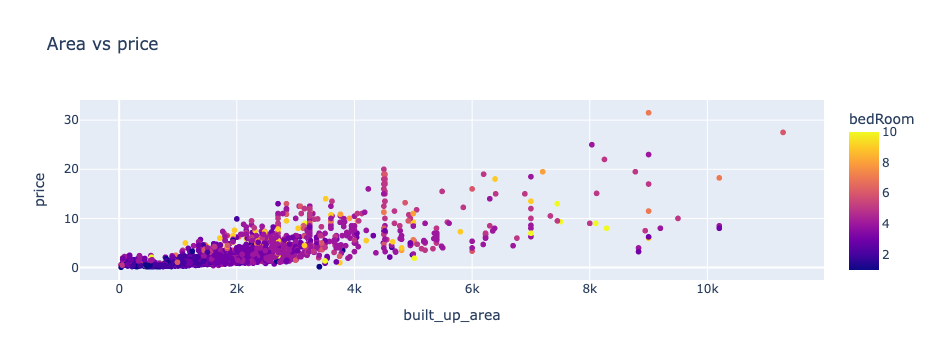

In [137]:
fig = px.scatter(df, x = 'built_up_area', y = 'price', color = 'bedRoom', title = 'Area vs price')

# Show the plot
fig.show()

In [139]:
# Pie chart bhk filter sector wise

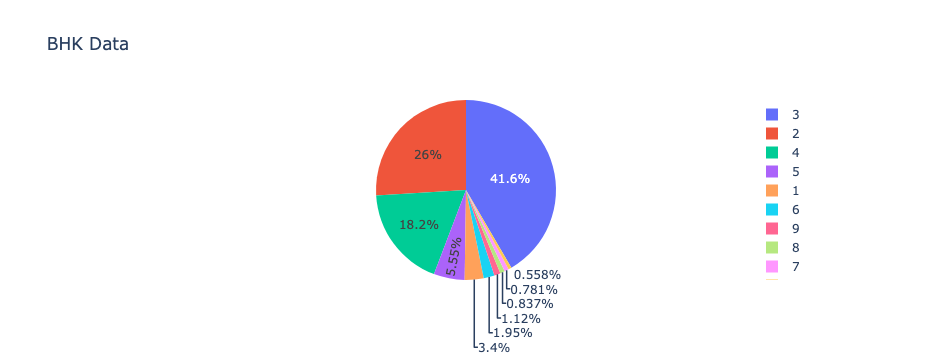

In [143]:
fig = px.pie(df, names = 'bedRoom', title = 'BHK Data')
fig.show()